In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from LinearRegression import *

In [2]:
csv = np.genfromtxt("e2.csv", delimiter=',', skip_header=1, dtype=float)
np.random.shuffle(csv)
train_len = int(csv.shape[0]*0.8)
train_csv = csv[:train_len]
val_csv = csv[train_len:]

t_data = train_csv[:,:-1]
t_label = np.array(train_csv[:,-1]).reshape(len(t_data),1)

v_data = val_csv[:,:-1]
v_label = np.array(val_csv[:,-1]).reshape(len(v_data),1)

In [3]:
lr = LinearRegression(t_data,t_label,2,4)
lr.train(0.03,12000)
r2=lr.score(v_data,v_label)
print(f"r2:{r2}")

r2:0.9987735173826813


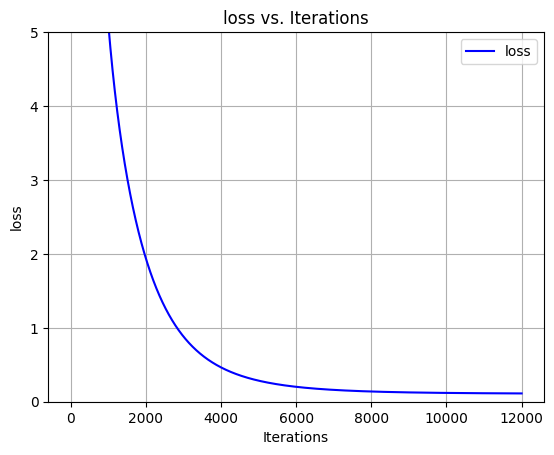

In [4]:
plt.plot(range(len(lr.loss)), lr.loss, label='loss', color='blue')
plt.title('loss vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('loss')
plt.legend() 
plt.ylim(0,5)
plt.grid(True) 
plt.show()


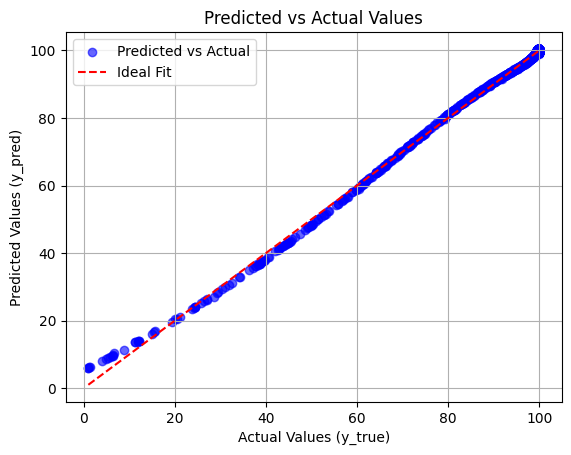

In [5]:
y_true = t_label
y_pred = lr.predict(np.array(t_data))
plt.scatter(y_true, y_pred, label='Predicted vs Actual', color='blue', alpha=0.6)
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values (y_true)')
plt.ylabel('Predicted Values (y_pred)')
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--', label='Ideal Fit')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
lr.save_model("e2.npz")

In [4]:
lr = LinearRegression(None,None)
lr.load_model("e2.npz")